### 🧷☘️ mini Project

 > 서울시 부동산 실거래가 데이터를 분석하여 층수에 따른 거래 금액 차이를 비교하고 예측하는 작업

### **🔥 프로젝트 개요**

✅ **목표:**

- 서울시 **자치구/법정동 단위로 범죄 발생 데이터를 분석**하여 위험 지역을 식별
- 머신러닝 모델을 활용해 **범죄 발생 예측**
- 웹 서비스로 **사용자가 자신의 위치에서 위험도(안전도도)를 확인**

✅ **활용할 데이터:**

- 서울시 열린데이터광장의 **범죄 발생 데이터 (예: 절도, 폭행, 강도, 성범죄 등)**
- 경찰청/통계청 데이터 (치안시설, CCTV 개수 등)
- 추가적으로 **날씨, 시간대, 유동 인구** 등의 변수도 고려 가능

✅ **예상 기술 스택:**

- **데이터 수집:** `requests` (API) + `pandas` (파일처리)
- **DB 저장:** MongoDB
- **분석 및 모델링:** `scikit-learn` (랜덤포레스트, 로지스틱 회귀 등)
- **시각화:** `Matplotlib`, `Seaborn`, `Folium` (지도 시각화)
- **웹 서비스:** `Flask` + `Plotly/Dash` (대시보드)

### 1️⃣ 데이터 수집 및 로드

* 필요한 라이브러리 설치

In [170]:
import pandas as pd

* 필요한 데이터 수집 - 서울시 부동산, cctv, 5대범죄, 경찰서 (head 부분만 보여줌)

In [171]:
# 데이터 파일 경로 (예: CSV 파일 로드)
file_path = '서울시 부동산 실거래가 정보(2022~2025).csv'

# CSV 파일을 Pandas 데이터프레임으로 로드
data = pd.read_csv(file_path, encoding='euc-kr')

# 데이터 확인
# print(data.head())

data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_8164\742582261.py:5: DtypeWarning:

Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.



,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2025,11320,도봉구,10600,방학동,1.0,대지,638.0,10.0,한신빌라(638-10),...,14800,37.66,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,39620,74.08,182.00,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN
2,2025,11500,강서구,10200,등촌동,1.0,대지,628.0,13.0,현대프린스텔,...,10300,26.16,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구
3,2025,11620,관악구,10200,신림동,1.0,대지,1639.0,51.0,푸리마타운,...,12700,18.70,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구
4,2025,11530,구로구,10600,고척동,1.0,대지,339.0,0.0,고척파크푸르지오,...,84000,59.89,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구"


In [210]:
data['지번구분명'].value_counts

<bound method IndexOpsMixin.value_counts of 0          대지
1         NaN
2          대지
3          대지
4          대지
         ... 
235666    NaN
235667     대지
235668    NaN
235669     대지
235670     대지
Name: 지번구분명, Length: 235671, dtype: object>

In [172]:
# 부동산 실거래가 데이터 로드 (CSV 파일)
real_estate_file = '서울시 부동산 실거래가 정보(2022~2025).csv'
real_estate_data = pd.read_csv(real_estate_file, encoding='euc-kr')

# 필요한 컬럼 선택 (예: 자치구명, 법정동명, 계약일, 물건금액(만원), 건물면적(㎡), 층, 건축년도)
real_estate_data = real_estate_data[['자치구명', '법정동명', '계약일', '물건금액(만원)', '건물면적(㎡)', '층', '건축년도']]

real_estate_data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_8164\3636665340.py:3: DtypeWarning:

Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.



,자치구명,법정동명,계약일,물건금액(만원),건물면적(㎡),층,건축년도
0,도봉구,방학동,20250117,14800,37.66,4.0,1994.0
1,은평구,역촌동,20250117,39620,74.08,NaN,1972.0
2,강서구,등촌동,20250117,10300,26.16,6.0,1999.0
3,관악구,신림동,20250117,12700,18.70,8.0,2014.0
4,구로구,고척동,20250117,84000,59.89,9.0,2009.0


In [173]:
# CCTV 데이터 로드 (CSV 파일 예시)
cctv_file = '서울시 자치구cctv.csv'  # 파일 이름 (실제 파일명을 사용)
cctv_data = pd.read_csv(cctv_file,  encoding='utf-8')  # 파일 인코딩에 맞게 지정

# 예시 데이터 프레임 구조 확인
cctv_data.head()


,자치구,CCTV_총계
0,종로구,2339
1,중구,3118
2,용산구,3609
3,성동구,4638
4,광진구,4636


In [174]:
# 범죄 발생현황 데이터 로드 (CSV 파일 예시)
crime_file = '서울시 5대범죄발생.csv'
crime_data = pd.read_csv(crime_file, encoding='utf-8', sep='\t')  # 파일 인코딩에 맞게 지정

# 데이터 구조 확인 (예: 자치구별(1), 자치구별(2), 각 범죄 발생 건수 등)
crime_data.head()

,자치구,살인,강도,강간·강제추행,절도,폭력,범죄_합계
0,종로구,5,5,239,1169,1563,2981
1,중구,3,6,212,1520,1607,3348
2,용산구,3,3,245,978,1792,3021
3,성동구,2,2,119,893,1007,2023
4,광진구,2,5,238,1616,1563,3424


In [175]:
# 파출소, 지구대 데이터 로드 (csv 파일 예시)
police_file = '서울시 경찰청.csv'
police_data = pd.read_csv(police_file, encoding='euc-kr')

police_data.head()

,연번,시도청,경찰서,관서명,구분,전화번호,주소
0,1,서울청,서울중부,을지,지구대,02-2279-1908,서울특별시 중구 을지로 234
1,2,서울청,서울중부,광희,지구대,02-2233-1444,서울특별시 중구 퇴계로 375-1
2,3,서울청,서울중부,약수,지구대,02-2234-8112,"서울특별시 중구 동호로 5길 15, 약수지구대"
3,4,서울청,서울중부,신당,파출소,02-2252-0435,"서울특별시 중구 다산로 248 (신당동, 신당파출소)"
4,5,서울청,서울중부,장충,파출소,02-2274-9003,서울특별시 중구 동호로 261


In [176]:
# 파출소, 지구대 데이터 로드 (csv 파일 예시)
police_file = '서울시 경찰청.csv'
police_data = pd.read_csv(police_file, encoding='euc-kr')

# '시도청' 컬럼에서 '서울청'인 데이터만 필터링
seoul_data = police_data[police_data['시도청'] == '서울청']

seoul_data.head()

,연번,시도청,경찰서,관서명,구분,전화번호,주소
0,1,서울청,서울중부,을지,지구대,02-2279-1908,서울특별시 중구 을지로 234
1,2,서울청,서울중부,광희,지구대,02-2233-1444,서울특별시 중구 퇴계로 375-1
2,3,서울청,서울중부,약수,지구대,02-2234-8112,"서울특별시 중구 동호로 5길 15, 약수지구대"
3,4,서울청,서울중부,신당,파출소,02-2252-0435,"서울특별시 중구 다산로 248 (신당동, 신당파출소)"
4,5,서울청,서울중부,장충,파출소,02-2274-9003,서울특별시 중구 동호로 261


In [177]:
person_file = '등록인구.csv'
person_data = pd.read_csv(person_file, encoding='utf-8')

person_data.head()

,동별(1),동별(2),2024 4/4,2024 4/4.1,2024 4/4.2,2024 4/4.3,2024 4/4.4,2024 4/4.5,2024 4/4.6,2024 4/4.7,2024 4/4.8,2024 4/4.9,2024 4/4.10,2024 4/4.11
0,동별(1),동별(2),세대 (세대),계 (명),계 (명),계 (명),한국인 (명),한국인 (명),한국인 (명),등록외국인 (명),등록외국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명)
1,동별(1),동별(2),소계,소계,남자,여자,소계,남자,여자,소계,남자,여자,소계,소계
2,합계,소계,4482063,9597372,4619963,4977409,9331828,4505355,4826473,265544,114608,150936,2.08,1824895
3,합계,종로구,72166,149608,71365,78243,138336,66570,71766,11272,4795,6477,1.92,29840
4,합계,중구,64995,131214,62924,68290,120544,58015,62529,10670,4909,5761,1.85,26853


### 2️⃣ 데이터 전처리 및 정리

✅ **필요한 작업**  - 필요한 컬럼정리 & 데이터 병합
- 부동산 실거래가 데이터에서 자치구별 평균 거래 금액 계산  
- 범죄 데이터에서 자치구별 총 범죄 발생 건수 정리  
- CCTV 데이터에서 자치구별 CCTV 개수 정리  
- 치안 시설 데이터에서 차안시설 개수 정리
- 데이터셋 간 컬럼명 통일 (자치구 기준)

In [178]:
# 부동산 실거래가 데이터 로드 (CSV 파일)
real_estate_file = '서울시 부동산 실거래가 정보(2022~2025).csv'
real_estate_data = pd.read_csv(real_estate_file, encoding='euc-kr')

# 필요한 컬럼 선택 (예: 자치구명, 법정동명, 계약일, 물건금액(만원), 건물면적(㎡), 층, 건축년도)
real_estate_data = real_estate_data[['자치구명', '법정동명', '계약일', '물건금액(만원)', '건물면적(㎡)', '층', '건축년도']]

# 자치구명을 기준으로 분석할 것이므로, 컬럼명을 '자치구'로 재설정
real_estate_data.rename(columns={'자치구명': '자치구'}, inplace=True)

# 🔹 자치구별 평균 거래금액, 건물 면적, 건축년도 평균 산출
real_estate_grouped_data = real_estate_data.groupby('자치구').agg({
    '물건금액(만원)': 'mean',
    '건물면적(㎡)': 'mean',
    '건축년도': 'mean'
}).reset_index()

# 🔹 컬럼명 변경
real_estate_grouped_data.rename(columns={
    '물건금액(만원)': '평균거래금액',
    '건물면적(㎡)': '평균건물면적',
    '건축년도': '평균건축년도'
}, inplace=True)

# 결과 확인
real_estate_grouped_data


C:\Users\user\AppData\Local\Temp\ipykernel_8164\572502328.py:3: DtypeWarning:

Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.



,자치구,평균거래금액,평균건물면적,평균건축년도
0,강남구,175249.427417,79.076040,1969.486368
1,강동구,74539.098009,62.631046,1950.334511
2,강북구,36790.413714,59.379247,1989.167861
3,강서구,41237.221077,50.553006,2007.690953
4,관악구,48789.376776,66.181239,1998.160375
5,광진구,74112.636846,69.432226,1980.390351
6,구로구,43640.239348,57.414521,2003.107029
7,금천구,37890.772739,52.108477,2012.116243
8,노원구,55159.558606,62.006903,1994.416388
9,도봉구,38065.337139,62.258850,1999.531868


In [179]:
# CCTV 데이터 로드 (CSV 파일)
cctv_file = '서울시 자치구cctv.csv'
cctv_data = pd.read_csv(cctv_file, encoding='utf-8-sig')
# 파일의 컬럼은 이미 '자치구'와 'CCTV_총계'로 구성되어 있음

# 결과 확인
cctv_data


,자치구,CCTV_총계
0,종로구,2339
1,중구,3118
2,용산구,3609
3,성동구,4638
4,광진구,4636
5,동대문구,3846
6,중랑구,5392
7,성북구,4906
8,강북구,3584
9,도봉구,2808


In [180]:
# 범죄 발생현황 데이터 로드 (CSV 파일 예시)
crime_file = '서울시 5대범죄발생.csv'
crime_data = pd.read_csv(crime_file, encoding='utf-8', sep='\t')  # 파일 인코딩에 맞게 지정

crime_data = crime_data[['자치구', '범죄_합계']]
# 데이터 구조 확인 (예: 자치구별(1), 자치구별(2), 각 범죄 발생 건수 등)
crime_data

,자치구,범죄_합계
0,종로구,2981
1,중구,3348
2,용산구,3021
3,성동구,2023
4,광진구,3424
5,동대문구,2957
6,중랑구,3324
7,성북구,2411
8,강북구,2497
9,도봉구,1921


In [181]:
# '시도청' 컬럼에서 '서울청'인 데이터만 필터링
seoul_data = police_data[police_data['시도청'] == '서울청']

# 주소에서 구 이름 추출 (예: '서울특별시 중구 을지로 234' → '중구')
seoul_data['구'] = seoul_data['주소'].str.split().str[1]

# 구별 개수 세기
gu_data = seoul_data['구'].value_counts().reset_index()
gu_data.columns = ['자치구', '치안시설_합계']

# 결과 출력
gu_data

C:\Users\user\AppData\Local\Temp\ipykernel_8164\1772231041.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,자치구,치안시설_합계
0,종로구,20
1,중구,15
2,강남구,14
3,송파구,11
4,서초구,11
5,동대문구,11
6,성북구,10
7,영등포구,10
8,강서구,10
9,광진구,10


In [182]:
# 필요한 컬럼만 선택 (구 이름과 전체 인구 수)
human_data = person_data.iloc[2:, [1, 3]]  # 첫 번째 컬럼(구), 네 번째 컬럼(전체 인구 수) 선택

# 컬럼명 변경
human_data.columns = ["자치구", "전체인구수"]
human_data = human_data[~human_data["자치구"].str.contains("소계", na=False)]

# 인덱스 리셋
human_data = human_data.reset_index(drop=True)

human_data

,자치구,전체인구수
0,종로구,149608
1,중구,131214
2,용산구,217194
3,성동구,281289
4,광진구,348652
5,동대문구,358603
6,중랑구,385349
7,성북구,435037
8,강북구,289374
9,도봉구,306032


In [183]:
size_file = '서울시 행정구역.csv'
size_data = pd.read_csv(size_file, encoding='utf-8')

size_data

,자치구,땅면적
0,종로구,23.91
1,중구,9.96
2,용산구,21.87
3,성동구,16.82
4,광진구,17.06
5,동대문구,14.22
6,중랑구,18.50
7,성북구,24.58
8,강북구,23.60
9,도봉구,20.65


> 📌 자치구 기준 데이터 병합 - 데이터 셋 간 컬럼 명 통일 자치구 맞춤

In [184]:
# 데이터 병합 (자치구 기준)
merged_data = crime_data.merge(cctv_data, on='자치구').merge(real_estate_grouped_data, on='자치구').merge(gu_data, on='자치구').merge(human_data, on='자치구').merge(size_data, on='자치구')


In [185]:
merged_data

,자치구,범죄_합계,CCTV_총계,평균거래금액,평균건물면적,평균건축년도,치안시설_합계,전체인구수,땅면적
0,종로구,2981,2339,70475.616528,69.724773,2001.131785,20,149608,23.91
1,중구,3348,3118,75016.632878,63.949920,1979.071470,15,131214,9.96
2,용산구,3021,3609,159554.119372,83.948502,1998.813546,7,217194,21.87
3,성동구,2023,4638,122804.979214,75.698076,1994.117491,9,281289,16.82
4,광진구,3424,4636,74112.636846,69.432226,1980.390351,10,348652,17.06
5,동대문구,2957,3846,62288.451220,64.781042,1940.102780,11,358603,14.22
6,중랑구,3324,5392,45769.851034,60.654311,1999.330731,8,385349,18.50
7,성북구,2411,4906,64624.189311,72.747125,1995.559771,10,435037,24.58
8,강북구,2497,3584,36790.413714,59.379247,1989.167861,9,289374,23.60
9,도봉구,1921,2808,38065.337139,62.258850,1999.531868,8,306032,20.65


In [186]:
merged_data.columns

Index(['자치구', '범죄_합계', 'CCTV_총계', '평균거래금액', '평균건물면적', '평균건축년도', '치안시설_합계',
       '전체인구수', '땅면적'],
      dtype='object')

In [187]:
# 🔹 데이터 타입 변환 (문자열 → 숫자)
columns_to_convert = ["범죄_합계", "CCTV_총계", "치안시설_합계", "땅면적", "전체인구수"]
for col in columns_to_convert:
    merged_data[col] = pd.to_numeric(merged_data[col], errors="coerce")  # 문자열 → 숫자로 변환

# 🔹 NaN 값 제거
merged_data = merged_data.dropna(subset=columns_to_convert)

# 🔹 위험도 계산
merged_data["범죄율"] = merged_data["범죄_합계"] / (merged_data["전체인구수"] + 1)
merged_data["CCTV비율"] = merged_data["CCTV_총계"] / (merged_data["땅면적"] + 1)
merged_data["치안시설비율"] = merged_data["치안시설_합계"] / (merged_data["땅면적"] + 1)
merged_data["위험도"] = merged_data["범죄율"] / (merged_data["CCTV비율"] + merged_data["치안시설비율"] + 1)

### 3️⃣ 데이터 분석 및 시각화

- 필요한 라이브러리 설치

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import matplotlib.ticker as mticker
import platform
import plotly.express as px
import folium

✅ **상관관계 분석**  

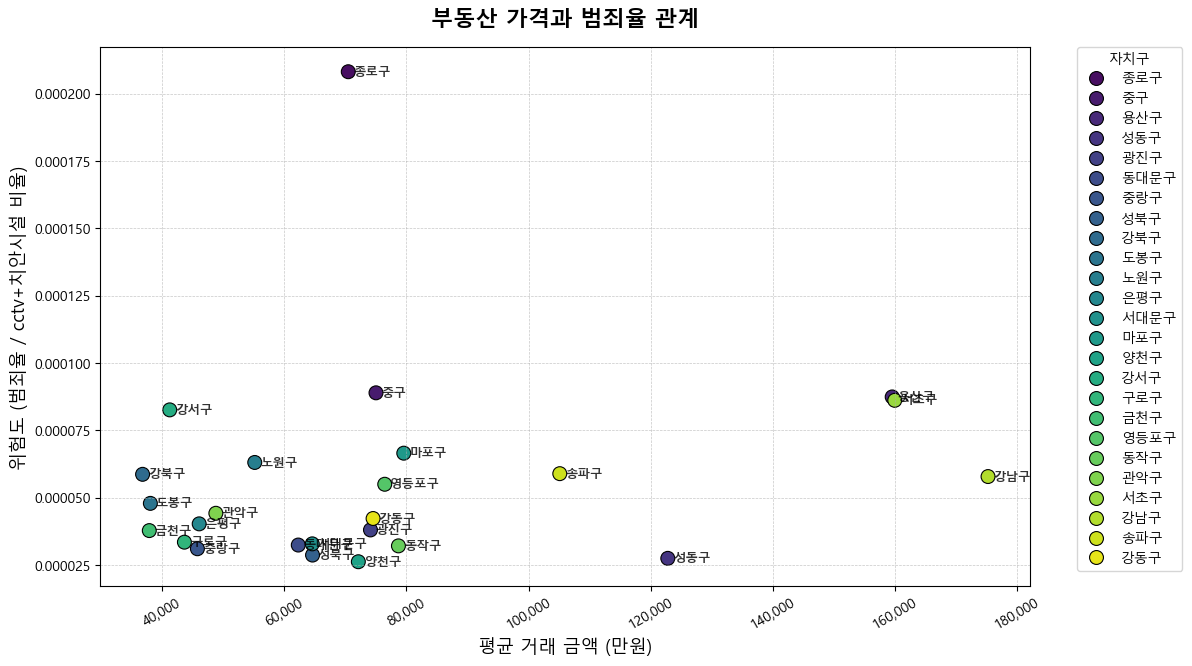

In [189]:
# 🔹 한글 폰트 설정 (Windows, Mac, Linux 지원)
plt.rcParams["axes.unicode_minus"] = False
font_name = "Malgun Gothic" if platform.system() == "Windows" else "AppleGothic" if platform.system() == "Darwin" else "NanumGothic"
plt.rc("font", family=font_name)

# 🔹 그래프 크기 설정
plt.figure(figsize=(12, 7))

# 🔹 산점도 플롯 (hue로 자치구별 색상 구분)
scatter = sns.scatterplot(
    x="평균거래금액", y="위험도", data=merged_data, hue="자치구",
    s=100, palette="viridis", edgecolor="black"
)

# 🔹 각 데이터 포인트 옆에 자치구 이름 표시 (오른쪽으로 이동)
x_offset = merged_data["평균거래금액"].max() * 0.005  # 🔹 X축 기준으로 0.5% 오른쪽 이동

for i in range(len(merged_data)):
    plt.text(
        merged_data["평균거래금액"].iloc[i] + x_offset,  # 🔹 오른쪽으로 이동
        merged_data["위험도"].iloc[i], 
        merged_data["자치구"].iloc[i],
        fontsize=9, ha="left", va="center", fontweight="bold", color="black", alpha=0.8
    )

# 🔹 그래프 제목 및 라벨
plt.title("부동산 가격과 범죄율 관계", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("평균 거래 금액 (만원)", fontsize=13)
plt.ylabel("위험도 (범죄율 / cctv+치안시설 비율)", fontsize=13)

# 🔹 X축 라벨을 천 단위 콤마(,) 형식으로 표시하여 가독성 향상
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.xticks(rotation=30)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(title="자치구", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)


# 🔹 그래프 표시
plt.show()


✅ **자치구별 위험도 바 차트**

##### 위험도(범죄 / CCTV)의 의미  

🔹 **공식:**  
$$
\text{위험도} = \frac{\text{총범죄발생 비율}}{\text{CCTV 비율} + {치안시설 비율} + 1}
$$

- **총범죄발생 수**: 해당 자치구에서 1년 동안 발생한 범죄 총합  
- **CCTV 개수**: 해당 자치구의 공공 CCTV 설치 수  
- **+1을 추가한 이유**: 일부 지역에서 CCTV 개수가 0일 경우 무한대 오류 방지  

📌 **해석**  
- **위험도가 높을수록** → CCTV 1대당 감시해야 하는 범죄 수가 많아 **범죄 예방 효과가 낮음**  
- **위험도가 낮을수록** → CCTV 1대당 감시하는 범죄가 적어 **더 안전한 지역**으로 볼 수 있음  


C:\Users\user\AppData\Local\Temp\ipykernel_8164\833508838.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




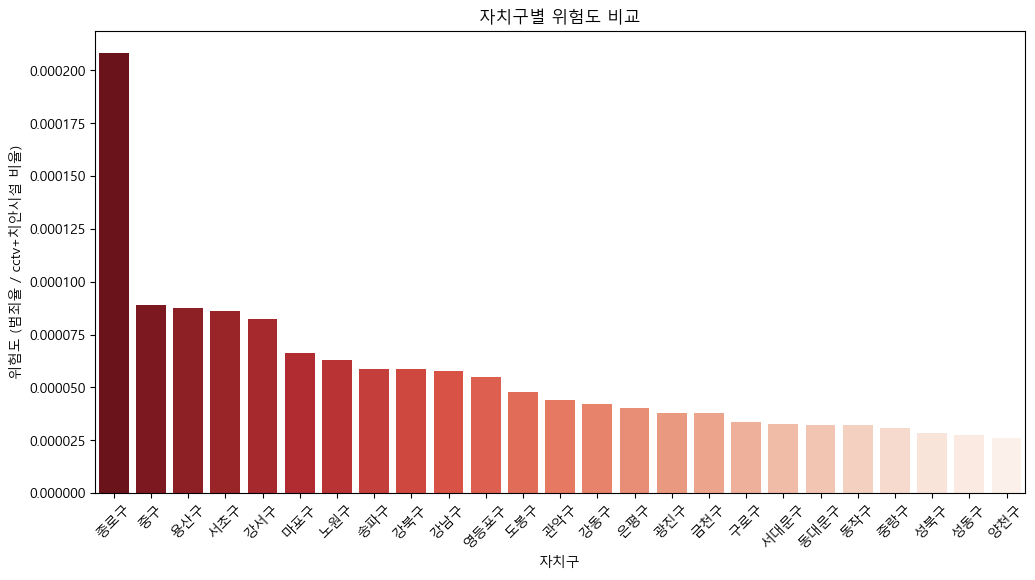

In [190]:
plt.figure(figsize=(12, 6))
sns.barplot(x="자치구", y="위험도", data=merged_data.sort_values(by="위험도", ascending=False), palette="Reds_r")
plt.xticks(rotation=45)
plt.title("자치구별 위험도 비교")
plt.xlabel("자치구")
plt.ylabel("위험도 (범죄율 / cctv+치안시설 비율)")
plt.show()

✅ **cctv 개수와 평균 거래 금액 비교 데이터 필터링**

- 주요 요소 : CCTV 개수, 평균 거래 금액, 버블 크기
- 사용 기술 : pandas, matpolotlib.pyplot, colorbar, text()
- 특징 : CCTV 개수와 평균 거래 금액 간의 관계 시각화

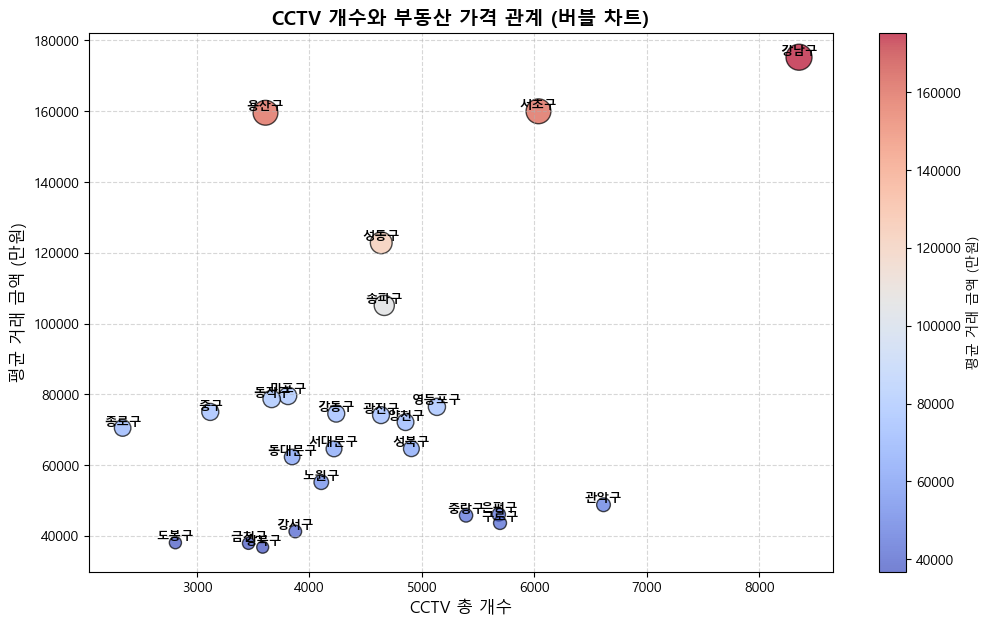

In [191]:
# 🔹 CCTV 개수와 평균 거래 금액 비교를 위한 데이터 필터링
cctv_vs_price = merged_data[["자치구", "CCTV_총계", "평균거래금액"]].dropna()

# 🔹 버블 차트 시각화 (CCTV 개수 vs 평균 거래 금액)
plt.figure(figsize=(12, 7))
bubble = plt.scatter(
    cctv_vs_price["CCTV_총계"],
    cctv_vs_price["평균거래금액"],
    s=cctv_vs_price["평균거래금액"] / 500,  # 버블 크기 조정 (부동산 가격에 비례)
    c=cctv_vs_price["평균거래금액"],
    cmap="coolwarm",
    alpha=0.7,
    edgecolors="black"
)

# 🔹 각 데이터 포인트 옆에 자치구 이름 표시
for i in range(len(cctv_vs_price)):
    plt.text(
        cctv_vs_price["CCTV_총계"].iloc[i],
        cctv_vs_price["평균거래금액"].iloc[i],
        cctv_vs_price["자치구"].iloc[i],
        fontsize=9,
        ha="center",
        va="bottom",
        fontweight="bold"
    )

# 🔹 그래프 제목 및 라벨 설정
plt.title("CCTV 개수와 부동산 가격 관계 (버블 차트)", fontsize=14, fontweight="bold")
plt.xlabel("CCTV 총 개수", fontsize=12)
plt.ylabel("평균 거래 금액 (만원)", fontsize=12)

# 🔹 컬러 바 추가 (부동산 가격을 색상으로 표시)
cbar = plt.colorbar(bubble)
cbar.set_label("평균 거래 금액 (만원)")

# 🔹 그래프 표시
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

✅ **안전도 바차트**

- 주요 요소: CCTV 개수, 경찰서 개수, 범죄 발생 수
- 사용 기술: pandas(데이터 처리), plotly.express(시각화)
- 특징: 마우스를 올리면 데이터 확인 가능, 막대 위 점수 표시, 색상 변화로 직관적 비교 가능

In [192]:
# 🔹 안전도 점수 계산 (차이를 극대화하여 직관적으로 변환)
merged_data["안전도_점수"] = ((1 / (1 + merged_data["위험도"])) * 100000).round(2) - 99910

# 🔹 안전도_라벨 (중앙값 기준으로 안전 지역과 위험 지역 구분)
merged_data["안전도_라벨"] = (merged_data["안전도_점수"] > merged_data["안전도_점수"].median()).astype(int)

# 🔹 안전도 점수를 내림차순 정렬
merged_data_sorted = merged_data.sort_values(by="안전도_점수", ascending=False)

# 🔹 Plotly 막대 그래프 생성
fig = px.bar(
    merged_data_sorted,
    x="자치구",
    y="안전도_점수",
    text="안전도_점수",
    title="📊 서울시 자치구별 안전도 점수 비교 (차이 극대화)",
    color="안전도_점수",
    color_continuous_scale="Blues_r"  # 🔹 높은 점수가 더 강조되도록 색상 반전
)

# 🔹 그래프 레이아웃 조정 (더 명확한 차이 강조)
fig.update_traces(texttemplate="%{text:.1f}", textposition="outside")  # 🔹 소수점 1자리까지 표시
fig.update_layout(
    xaxis_title="자치구",
    yaxis_title="안전도 점수",
    xaxis=dict(tickangle=-45),  # 🔹 X축 라벨 회전
    width=800,
    height=600  # 🔹 그래프 높이 증가 (가독성 향상)
)

# 🔹 그래프 출력
fig.show()


✅ **3D 분석**

In [193]:
# 🔹 안전도 점수 계산 (CCTV 개수와 경찰서 개수를 고려)
merged_data["안전도_점수"] = (merged_data["CCTV비율"] + merged_data["치안시설비율"]) / (merged_data["범죄_합계"] + 1)

# 🔹 3D 산점도 그래프 생성 (X: 범죄율, Y: 부동산 가격, Z: 안전도)
fig = px.scatter_3d(
    merged_data,
    x="범죄_합계", 
    y="평균거래금액", 
    z="안전도_점수",
    color="평균거래금액",  # 색상을 부동산 가격으로 설정
    size="안전도_점수",  # 점의 크기를 안전도로 설정
    hover_name="자치구",
    title="📊 안전도, 부동산 가격, 범죄율 3D 분석",
    labels={"범죄_합계": "범죄율", "평균거래금액": "부동산 가격", "안전도_점수": "안전도 점수"}
)

# 🔹 그래프 표시
fig.show()


✅ **안전한 거주지 추천**

In [194]:
# 🔹 안전도 점수 계산 (CCTV 및 치안시설 비율 반영)
merged_data["안전도_점수"] = (merged_data["CCTV비율"] + merged_data["치안시설비율"]) / (merged_data["범죄_합계"] + 1)

# 🔹 안전도 순으로 정렬 (높을수록 안전) → 컬럼명 수정
merged_data = merged_data.sort_values(by="안전도_점수", ascending=False)

# 🔹 안전도 점수 + 부동산 가격 고려하여 거주지 추천
merged_data["추천_점수"] = merged_data["안전도_점수"] * 0.7 + (merged_data["평균거래금액"] / 10000) * 0.3  # 가중치 조정 가능

# 🔹 추천 거주지 TOP 5
best_places = merged_data.sort_values(by="추천_점수", ascending=False).head(5)

# 📌 추천 결과 출력
print("\n🏡 거주지 추천 (TOP 5)")
print(best_places[['자치구', '추천_점수', '안전도_점수', '평균거래금액']])



🏡 거주지 추천 (TOP 5)
    자치구     추천_점수    안전도_점수         평균거래금액
22  강남구  5.278860  0.030539  175249.427417
2   용산구  4.823248  0.052320  159554.119372
21  서초구  4.818683  0.027870  159972.466543
3   성동구  3.774338  0.128841  122804.979214
23  송파구  3.171401  0.025662  105114.596838


📌 현재 데이터프레임 컬럼명: Index(['자치구', '범죄_합계', 'CCTV_총계', '평균거래금액', '평균건물면적', '평균건축년도', '치안시설_합계',
       '전체인구수', '땅면적', '범죄율', 'CCTV비율', '치안시설비율', '위험도', '안전도_점수', '안전도_라벨',
       '추천_점수'],
      dtype='object')


C:\Users\user\AppData\Local\Temp\ipykernel_8164\1123119014.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




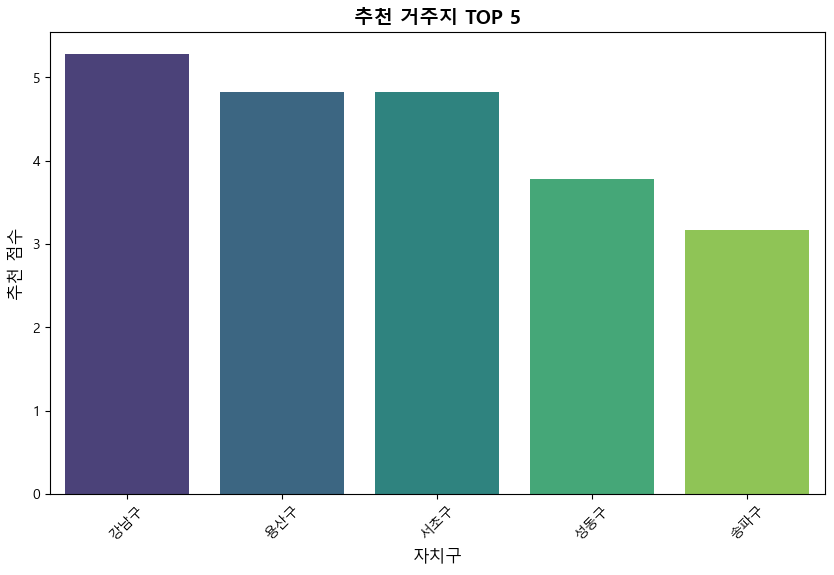

In [195]:
# 🔹 컬럼명 확인 (디버깅용)
print("📌 현재 데이터프레임 컬럼명:", best_places.columns)

# 🔹 컬럼명이 "추천_점수"인지 확인 후 수정
if "추천_점수" in best_places.columns:
    best_places = best_places.rename(columns={"추천_점수": "추천 점수"})

# 🔹 차트 그리기 (컬럼명 수정 후 적용)
plt.figure(figsize=(10, 6))
sns.barplot(x="자치구", y="추천 점수", data=best_places, palette="viridis")

plt.title("추천 거주지 TOP 5", fontsize=14, fontweight="bold")
plt.xlabel("자치구", fontsize=12)
plt.ylabel("추천 점수", fontsize=12)
plt.xticks(rotation=45)

plt.show()


✅ **서울시 지도 시각화 (Folium)**

In [196]:
# 서울시 각 구의 중심 좌표 (출처: 서울 열린데이터광장)
geo_data = {
    "자치구": ["종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구",
             "성북구", "강북구", "도봉구", "노원구", "은평구", "서대문구", "마포구",
             "양천구", "강서구", "구로구", "금천구", "영등포구", "동작구", "관악구",
             "서초구", "강남구", "송파구", "강동구"],
    "위도": [37.5733, 37.5636, 37.5326, 37.5507, 37.5384, 37.5744, 37.5980,
           37.6069, 37.6396, 37.6688, 37.6542, 37.6176, 37.5792, 37.5663,
           37.5244, 37.5509, 37.4924, 37.4569, 37.5263, 37.4967, 37.4784,
           37.4836, 37.5172, 37.5113, 37.5301],
    "경도": [126.9784, 126.9978, 126.9906, 127.0413, 127.0822, 127.0384, 127.0762,
           127.0209, 127.0257, 127.0471, 127.0568, 126.9227, 126.9357, 126.9019,
           126.8563, 126.8495, 126.8874, 126.8950, 126.8963, 126.9445, 126.9516,
           127.0324, 127.0473, 127.1250, 127.1238]
}

# 데이터프레임 변환
geo_df = pd.DataFrame(geo_data)

# 기존 데이터(`merged_data`)에 위도, 경도 추가
merged_data = merged_data.merge(geo_df, on="자치구", how="left")


📌  **Folium 지도 시각화의 목적**
- 서울시 지도에서 각 자치구별로 "위험도"에 따라 원(circle marker)으로 시각화하여,
어느 지역이 상대적으로 범죄 발생률이 높고 CCTV가 부족한지 한눈에 확인 가능

In [197]:
# 서울 지도 생성
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 🔹 위험도가 가장 높은 5개, 가장 낮은 5개 찾기
top_5 = merged_data.nlargest(5, "위험도")  # 위험도 높은 5개
bottom_5 = merged_data.nsmallest(5, "위험도")  # 위험도 낮은 5개

# 🔹 지도에 원 추가
for idx, row in merged_data.iterrows():
    # 🔹 위험도가 가장 높은 5개는 빨간색
    if row["자치구"] in top_5["자치구"].values:
        color = "red"
        fill_color = "red"
    # 🔹 위험도가 가장 낮은 5개는 초록색
    elif row["자치구"] in bottom_5["자치구"].values:
        color = "green"
        fill_color = "green"
    # 🔹 나머지는 파란색
    else:
        color = "blue"
        fill_color = "blue"
    
    # 지도에 원 추가
    folium.CircleMarker(
        location=[row["위도"], row["경도"]],  # 위도, 경도 값 필요
        radius=5 + row["위험도"] * 10,  # 크기 조절
        popup=f"{row['자치구']}<br>위험도: {row['위험도']:.2f}",
        color=color,
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.6
    ).add_to(seoul_map)

#추가 설명 html
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    right: 20px;
    width: 160px;
    background-color: white;
    z-index:9999;
    padding: 10px;
    border-radius: 10px;
    box-shadow: 2px 2px 5px rgba(0,0,0,0.3);
    font-size: 12px;
">
    <b>🔹 지도 범례</b><br>
    <i class="fa fa-circle" style="color:red"></i> 위험도 높은 5개 지역<br>
    <i class="fa fa-circle" style="color:blue"></i> 일반 지역<br>
    <i class="fa fa-circle" style="color:green"></i> 위험도 낮은 5개 지역
</div>
'''

# 🔹 지도에 HTML 범례 추가
seoul_map.get_root().html.add_child(folium.Element(legend_html))

# HTML 파일로 저장하여 확인 가능
seoul_map.save("seoul_risk_map.html")

print("✅ 지도 저장 완료! 'seoul_risk_map.html'을 열어보세요.")


✅ 지도 저장 완료! 'seoul_risk_map.html'을 열어보세요.


### 4️⃣ 머신러닝을 활용한 범죄 예측

* 필요한 라이브러리 설치

In [216]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#### 📌 머신러닝을 활용한 안전한 거주지 추천 모델  

- **목표**: 부동산 가격 + 범죄율을 고려한 거주지 추천  
- **모델**: RandomForest, GradientBoosting, KMeans  
- **입력 데이터 (X)**: CCTV 개수, 파출소 개수, 범죄율, 부동산 가격  
- **타겟 값 (y)**: `안전한 거주지(1)` vs `위험한 거주지(0)`  

💡 데이터 기반으로 보다 정확한 주거 지역 추천 가능!

In [209]:
merged_data

# 🔹 데이터 전처리: 안전도 점수 계산
merged_data["안전도_점수"] = merged_data["CCTV_총계"] / (merged_data["범죄_합계"] + 1)  # 0으로 나누는 오류 방지
merged_data["안전도_라벨"] = (merged_data["안전도_점수"] > merged_data["안전도_점수"].median()).astype(int)  # 1: 안전, 0: 위험

# 🔹 입력 데이터 & 타겟 변수 설정
X = merged_data[["CCTV_총계", "치안시설_합계", "평균거래금액", "범죄_합계"]]
y = merged_data["안전도_라벨"]

# 🔹 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 모델 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 🔹 예측 및 평가
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# print(f"✅ 모델 정확도: {accuracy * 100:.2f}%")

# 🔹 새로운 데이터 예측 (예제)
new_data = pd.DataFrame({
    "CCTV_총계": [5000, 8000],  # CCTV 개수 예제
    "치안시설_합계": [10, 20],   # 파출소 개수 예제
    "평균거래금액": [80000, 150000],  # 평균 부동산 거래금액 예제
    "범죄_합계": [3000, 1000]   # 범죄 발생 수 예제
})

new_predictions = clf.predict(new_data)
new_data["예측_안전도"] = ["안전" if pred == 1 else "위험" for pred in new_predictions]

print("\n🔹 새로운 데이터 예측 결과:")
new_data



🔹 새로운 데이터 예측 결과:


,CCTV_총계,치안시설_합계,평균거래금액,범죄_합계,예측_안전도
0,5000,10,80000,3000,위험
1,8000,20,150000,1000,위험


### 🔢 범죄 발생 예측 모델링  

1️⃣ **데이터 준비** → X: CCTV 개수, 치안시설, 부동산 가격 등 / y: 범죄 발생 건수  
2️⃣ **데이터 전처리** → StandardScaler로 정규화  
3️⃣ **데이터 분리** → 80% 학습 / 20% 테스트  
4️⃣ **모델 학습** → XGBoost Regressor 사용  
5️⃣ **예측 수행** → `model.predict()`로 범죄 발생 수 예측  
6️⃣ **성능 평가** → MAE, RMSE 계산  

📌 **목표:** 지역별 범죄 발생 건수 예측 🚀  

In [214]:
# 🔹 데이터 로드 (merged_data 사용)
X = merged_data[["CCTV_총계", "치안시설_합계", "평균거래금액", "전체인구수", "땅면적"]]
y = merged_data["범죄_합계"]  # 범죄 발생 수 예측

# 🔹 데이터 정규화 (스케일 조정)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 데이터 분리 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 XGBoost 모델 생성 및 학습
model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# 🔹 예측 수행
y_pred = model.predict(X_test)

# 🔹 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 🔹 결과 출력
print(f"✅ 평균 절대 오차 (MAE): {mae:.2f} 건")
print(f"✅ 평균 제곱 오차 (MSE): {mse:.2f}")
print(f"✅ 평균 제곱근 오차 (RMSE): {rmse:.2f}")


✅ 평균 절대 오차 (MAE): 1100.30 건
✅ 평균 제곱 오차 (MSE): 1374658.38
✅ 평균 제곱근 오차 (RMSE): 1172.46


In [224]:
# 🔹 새로운 데이터 예측 (예제)
new_data = pd.DataFrame({
    "CCTV_총계": [4500, 7500],  # CCTV 개수 예제
    "치안시설_합계": [12, 20],   # 파출소 개수 예제
    "평균거래금액": [100000, 200000],  # 평균 부동산 거래금액 예제
    "전체인구수": [400000, 600000],  # 총 인구 수 예제
    "땅면적": [35, 50]   # 면적 (㎢) 예제
})

# 🔹 데이터 정규화
new_data_scaled = scaler.transform(new_data)

# 🔹 예측 수행
predictions = model.predict(new_data_scaled)

# 🔹 결과 출력
for i, pred in enumerate(predictions):
    print(f"📌 새로운 데이터 {i+1} → 예상 범죄 발생 수: {pred:.2f} 건")


📌 새로운 데이터 1 → 예상 범죄 발생 수: 3511.45 건
📌 새로운 데이터 2 → 예상 범죄 발생 수: 4769.06 건


In [ ]:
# 🔹 전체 구 데이터 준비
seoul_gu_data = merged_data[["자치구", "CCTV_총계", "치안시설_합계", "평균거래금액", "전체인구수", "땅면적", "범죄_합계"]]

# 🔹 입력 데이터(X) 정규화
seoul_gu_scaled = scaler.transform(seoul_gu_data.drop(columns=["자치구", "범죄_합계"]))

# 🔹 예측 수행 & 결과 정렬 (예측 범죄 발생 수 기준)
seoul_gu_data["예측 범죄 발생 수"] = model.predict(seoul_gu_scaled)
seoul_gu_data = seoul_gu_data.sort_values(by="예측 범죄 발생 수", ascending=False)
seoul_gu_data["절대 오차"] = abs(seoul_gu_data["예측 범죄 발생 수"] - seoul_gu_data["범죄_합계"])
seoul_gu_data = seoul_gu_data.sort_values(by="예측 범죄 발생 수", ascending=False)

# 🔹 최종 결과 출력
print("\n📌 서울시 전체 구별 예상 범죄 발생 수:")
print(seoul_gu_data[["자치구", "범죄_합계","예측 범죄 발생 수", "절대 오차"]].reset_index(drop=True))



📌 서울시 전체 구별 예상 범죄 발생 수:
     자치구  범죄_합계   예측 범죄 발생 수        절대 오차
0    강남구   6763  6762.989258     0.010742
1    관악구   4769  4768.996582     0.003418
2    서초구   4522  4521.997070     0.002930
3    강서구   4296  4295.996582     0.003418
4    마포구   3834  3833.996582     0.003418
5    구로구   3737  3736.998535     0.001465
6    노원구   3567  3566.998779     0.001221
7    은평구   3493  3492.998779     0.001221
8   영등포구   4418  3490.203125   927.796875
9    광진구   3424  3423.996582     0.003418
10   성북구   2411  3407.214844   996.214844
11   송파구   5223  3402.053223  1820.946777
12   강동구   3398  3398.003418     0.003418
13    중구   3348  3347.999023     0.000977
14   중랑구   3324  3324.003418     0.003418
15   성동구   2023  3185.390625  1162.390625
16   용산구   3021  3021.001709     0.001709
17   양천구   3019  3018.999268     0.000732
18   종로구   2981  2981.001465     0.001465
19  동대문구   2957  2957.000977     0.000977
20   동작구   2642  2642.001221     0.001221
21   도봉구   1921  2515.173340   594.173340
22   강북구 

C:\Users\user\AppData\Local\Temp\ipykernel_8164\1708955081.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 5️⃣ 데이터 저장 (DB)

* 필요한 라이브러리 설치

In [202]:
from pymongo import MongoClient

In [203]:
# 🔹 MongoDB 연결
client = MongoClient("mongodb://localhost:27017/")
db = client["SeoulCrimeDB"]

# 📂 CSV 파일 로드
# real_estate_data = pd.read_csv("서울시 부동산 실거래가 정보(2022~2025).csv",  encoding='euc-kr')
cctv_data = pd.read_csv("서울시 자치구cctv.csv", encoding="utf-8")
crime_data = pd.read_csv("서울시 5대범죄발생.csv", encoding="utf-8", sep='\t')
police_data = pd.read_csv("서울시 경찰서 갯수.csv", encoding="utf-8")
merged_data
real_estate_grouped_data
person_data
size_data

# 🔹 기존 데이터 삭제 (테스트용, 필요 없으면 주석 처리)
db.real_estate.drop()
db.cctv.drop()
db.crime.drop()
db.police.drop()
db.merge.drop()
db.real_estate_grouped.drop()
db.person.drop()
db.size.drop()

# 🔹 CSV 데이터를 MongoDB에 저장
db.real_estate.insert_many(real_estate_data.to_dict("records"))
db.cctv.insert_many(cctv_data.to_dict("records"))
db.crime.insert_many(crime_data.to_dict("records"))
db.police.insert_many(police_data.to_dict("records"))
db.merge.insert_many(merged_data.to_dict("records"))
db.real_estate_grouped.insert_many(real_estate_grouped_data.to_dict("records"))
db.person.insert_many(person_data.to_dict("records"))
db.size.insert_many(size_data.to_dict("records"))

print("✅ CSV 데이터가 MongoDB(SeoulCrimeDB)에 저장되었습니다!")


✅ CSV 데이터가 MongoDB(SeoulCrimeDB)에 저장되었습니다!


In [204]:
# 🔹 MongoDB 연결
client = MongoClient("mongodb://localhost:27017/")
db = client["SeoulCrimeDB"]

# 🔹 저장된 컬렉션 목록 확인
collections = db.list_collection_names()
print("\n📂 MongoDB에 저장된 컬렉션 목록:")
print(collections)



📂 MongoDB에 저장된 컬렉션 목록:
['real_estate_grouped', 'police', 'crime', 'cctv', 'person', 'merge', 'size', 'real_estate']


> 데이터가 궁금하다면??

In [205]:
# 🔹 사용자 입력으로 컬렉션 선택
y = input("\n🔍 조회할 컬렉션 이름을 입력하세요: ")
# 🔹 입력한 컬렉션이 실제 존재하는지 확인 후 데이터 출력
if y in collections:
    print(f"\n📌 '{y}' 컬렉션 데이터 확인:")
    for doc in db[y].find().limit(20):  # 5개만 출력
        print(doc)
else:
    print(f"\n❌ 오류: '{y}' 컬렉션이 존재하지 않습니다. 다시 확인하세요.")


📌 'police' 컬렉션 데이터 확인:
{'_id': ObjectId('67b8007012da4714c4373c62'), '구': '종로구', '개수': 20}
{'_id': ObjectId('67b8007012da4714c4373c63'), '구': '중구', '개수': 15}
{'_id': ObjectId('67b8007012da4714c4373c64'), '구': '강남구', '개수': 14}
{'_id': ObjectId('67b8007012da4714c4373c65'), '구': '송파구', '개수': 11}
{'_id': ObjectId('67b8007012da4714c4373c66'), '구': '서초구', '개수': 11}
{'_id': ObjectId('67b8007012da4714c4373c67'), '구': '동대문구', '개수': 11}
{'_id': ObjectId('67b8007012da4714c4373c68'), '구': '성북구', '개수': 10}
{'_id': ObjectId('67b8007012da4714c4373c69'), '구': '영등포구', '개수': 10}
{'_id': ObjectId('67b8007012da4714c4373c6a'), '구': '강서구', '개수': 10}
{'_id': ObjectId('67b8007012da4714c4373c6b'), '구': '광진구', '개수': 10}
{'_id': ObjectId('67b8007012da4714c4373c6c'), '구': '강동구', '개수': 9}
{'_id': ObjectId('67b8007012da4714c4373c6d'), '구': '양천구', '개수': 9}
{'_id': ObjectId('67b8007012da4714c4373c6e'), '구': '관악구', '개수': 9}
{'_id': ObjectId('67b8007012da4714c4373c6f'), '구': '강북구', '개수': 9}
{'_id': ObjectId('67b800701